In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel("Sample_Longlist_Data.xlsx")
df.shape

(1839, 18)

In [3]:
pd.set_option('display.max_colwidth', None)
df.head(15)

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL
0,2020-11-15,Garden,Seller 1,Seller 1-link,Seller 1-storefrontlink,"1-16 of over 100,000 results",88% positive in the last 12 months (118 ratings),"Lohas Living Inc James Mazzello US 845 3RD Ave Fl 6 New York NY 10022-6630 +1208-964-6807 Email Address:jadgemaello@gmail.com James Mazzello US 845 3RD Ave Fl 6 New York NY 10022-6630 +1208-964-6807 EIN: 30-0961431 \nThe European Commission provides for an Online Dispute Resolution Platform, which you can access here: https://ec.europa.eu/consumers/odr/\n\nPlease see the following link for the nationally appointed Alternative Dispute Resolution bodies contact details: https://webgate.ec.europa.eu/od...",Business Name:Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-1410US,16,17,11,12,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/page/B9975298-FF1F-4EE2-BD7B-53AE47A44D8A?ref_=ast_bln
1,2020-11-15,Garden,Seller 2,Seller 2-link,Seller 2-storefrontlink,NaN,90% positive in the last 12 months (566 ratings),"Herzlich Willkommen im Amazon Shop von 1a-Handelsagentur. Für Fragen stehen wir Ihnen gerne unter der 039932-829721 zur Verfügung. Sie können auch direkt eine E-Mail an info@1a-handelsagentur.de schreiben. Anschrift\n1a-handelsagentur.de\nAndre Burmeister\nLindenallee 2\n17213 Malchow Kontakt\nTel.: 039932 - 829721 \nFax.: 039932 – 81417 \nE-Mail: info@1a-handelsagentur.de\nInternet: www.1a-handelsagentur.de\n\nUmsatzsteueridentnummer: DE 223758473 \nWir berechnen Ihnen folgende Versandkosten:(DE) Deutschland 0,00 E...",Business Name:1a-Handelsagentur,1a HandelsagenturLindenallee 2MalchowMecklenburg17213DE,0,2,2,9,0,0,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12E699E9-FA20-4BC9-A12B-8A9CDE0C446C?ref_=ast_bln
2,2020-11-15,Garden,Seller 3,Seller 3-link,Seller 3-storefrontlink,"1-16 of over 2,000 results",85% positive in the last 12 months (75 ratings),67878u6i7 is committed to providing each customer with the highest standard of customer service.,Business Name:nantongaohuanfangzhipinyouxiangongsi,zhongnanshijicheng27zhuang1410haochongchuanqunantongshi226000CN,15,0,25,12,164,162,TXYFYP,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0?ie=UTF8&search-type=ss&index=garden-de&field-keywords=TXYFYP
3,2020-11-15,Garden,Seller 4,Seller 4-link,Seller 4-storefrontlink,1-16 of 123 results,NaN,7 days home life supermarket is committed to providing each customer with the highest standard of customer service.,Business Name:Zhengzhou Yaoqiong Trading Company,河南省中兴南路福禄街自贸试验区郑州片区（郑东）河南商会大厦1901室450000CN,1,0,0,0,0,0,SHIFENG,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0?ie=UTF8&search-type=ss&index=kitchen-de&field-keywords=SHIFENG
4,2020-11-15,Garden,Seller 5,Seller 5-link,Seller 5-storefrontlink,"1-16 of over 1,000 results",81% positive in the last 12 months (52 ratings),78 68yui678 is committed to providing each customer with the highest standard of customer service.,Business Name:shenzhenfeichangshangmeimaoyiyouxiangongsi,minzhidadaoshaxialaocun94dongA901longhuaxinqushenzhenshi518000CN,16,0,31,15,224,113,YUOKI99,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0?ie=UTF8&search-type=ss&index=garden-de&field-keywords=YUOKI99
5,2020-11-15,Garden,Seller 6,Seller 6-link,Seller 6-storefrontlink,1-16 of 28 results,NaN,7830jeff is committed to providing each customer with the highest standard of customer service.,NaN,NaN,13,0,0,0,3284,2944,Strata,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0?ie=UTF8&search-type=ss&index=garden-de&field-keywords=Strata
6,2020-11-15,Garden,Seller 7,Seller 7-link,Seller 7-storefrontlink,"1-16 of over 4,000 results",NaN,

In [4]:
df.describe()

,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings
count,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000
mean,6.951060,5.808592,7.632409,12.312670,1399.745514,765.173464
std,6.232073,18.117027,19.902394,23.435871,6204.123987,3817.355945
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000,0.000000,3.000000,1.000000
75%,15.000000,0.000000,4.000000,14.000000,176.500000,87.500000
max,16.000000,100.000000,100.000000,100.000000,86856.000000,70732.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Date Added                                         1839 non-null   datetime64[ns]
 1   category                                           1839 non-null   object        
 2   sellerlink                                         1839 non-null   object        
 3   sellerlink-url                                     1839 non-null   object        
 4   sellerstorefront-url                               1839 non-null   object        
 5   sellerproductcount                                 1513 non-null   object        
 6   sellerratings                                      1411 non-null   object        
 7   sellerdetails                                      1812 non-null   object        
 8   seller business na

# Data Preprocessing

In [6]:
#remove unnecessary columns
cols_to_del=['Date Added', 'sellerlink-url', 'sellerstorefront-url']
df.drop(cols_to_del, axis=1, inplace=True)

In [7]:
#replace Nan with 0
cols_with_nan=['sellerproductcount', 'sellerratings', 'businessaddress', 'seller business name', 'sellerdetails']
for col in cols_with_nan:
  df[col].replace(np.nan, 0, inplace=True)

In [8]:
#extract country code and remove sellers (China)
df['country_code']=df['businessaddress'].str[-2:]
df=df[df['country_code']!='CN']

In [9]:
#Taking name from seller business name
for i,val in enumerate(df['seller business name']):

    if val != 0:

        vals = val.split(':')

        if len(vals) == 1:
            df['seller business name'].iloc[i] = df['seller business name'].iloc[i].replace(val,vals[0])
        else:
            df['seller business name'].iloc[i] = df['seller business name'].iloc[i].replace(val,vals[-1])

<ipython-input-9-fc8594186a9f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['seller business name'].iloc[i] = df['seller business name'].iloc[i].replace(val,vals[-1])


In [10]:
#Extracting seller product count

for i,val in enumerate(df['sellerproductcount']):

    if val != 0:

        sentence = df['sellerproductcount'].iloc[i]

        # Regex Pattern to extract numbers from the string
        pattern = re.findall(r'\b\d{1,3}(?:,\d{3})*(?:\.\d+)?(?!\d)', sentence)

        split_str = pattern[-1].split(',')

        to_repr = ''.join(split_str)

        df['sellerproductcount'].iloc[i] = df['sellerproductcount'].iloc[i].replace(val,to_repr)

<ipython-input-10-4765854d4d57>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sellerproductcount'].iloc[i] = df['sellerproductcount'].iloc[i].replace(val,to_repr)


In [11]:
df.head()


,category,sellerlink,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL,country_code
0,Garden,Seller 1,100000,88% positive in the last 12 months (118 ratings),"Lohas Living Inc James Mazzello US 845 3RD Ave Fl 6 New York NY 10022-6630 +1208-964-6807 Email Address:jadgemaello@gmail.com James Mazzello US 845 3RD Ave Fl 6 New York NY 10022-6630 +1208-964-6807 EIN: 30-0961431 \nThe European Commission provides for an Online Dispute Resolution Platform, which you can access here: https://ec.europa.eu/consumers/odr/\n\nPlease see the following link for the nationally appointed Alternative Dispute Resolution bodies contact details: https://webgate.ec.europa.eu/od...",Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-1410US,16,17,11,12,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/page/B9975298-FF1F-4EE2-BD7B-53AE47A44D8A?ref_=ast_bln,US
1,Garden,Seller 2,0,90% positive in the last 12 months (566 ratings),"Herzlich Willkommen im Amazon Shop von 1a-Handelsagentur. Für Fragen stehen wir Ihnen gerne unter der 039932-829721 zur Verfügung. Sie können auch direkt eine E-Mail an info@1a-handelsagentur.de schreiben. Anschrift\n1a-handelsagentur.de\nAndre Burmeister\nLindenallee 2\n17213 Malchow Kontakt\nTel.: 039932 - 829721 \nFax.: 039932 – 81417 \nE-Mail: info@1a-handelsagentur.de\nInternet: www.1a-handelsagentur.de\n\nUmsatzsteueridentnummer: DE 223758473 \nWir berechnen Ihnen folgende Versandkosten:(DE) Deutschland 0,00 E...",1a-Handelsagentur,1a HandelsagenturLindenallee 2MalchowMecklenburg17213DE,0,2,2,9,0,0,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12E699E9-FA20-4BC9-A12B-8A9CDE0C446C?ref_=ast_bln,DE
5,Garden,Seller 6,28,0,7830jeff is committed to providing each customer with the highest standard of customer service.,0,0,13,0,0,0,3284,2944,Strata,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0?ie=UTF8&search-type=ss&index=garden-de&field-keywords=Strata,NaN
14,Garden,Seller 15,919,97% positive in the last 12 months (116 ratings),"Impressum\n \n Gesetzliche Anbieterkennung:\n \n Oliver Mills\n 9:PM\n An der Bundesstrasse 26\n 33829 Borgholzhausen\n Deutschland\n Telefon: 015140008562\n E-Mail: webmaster@9pm-store.de\n USt-IdNr.: DE215752000\n \n Wir sind seit 01.08.2015 Mitglied der Initiative ""FairCommerce"".\n Nähere Informationen hierzu finden Sie unter .fair-commerce.de. Alternative Streitbeilegung: \nDie Europäische Kommission bietet eine Onlineplattform für Streitbeilegung an, die Sie hier finden: https://ec.europa.eu/consumers/odr/\n\nUnter diesem L...",Oliver Mills,Kaiserstr.12Borgholzhausen33829DE,15,0,0,3,1446,921,Unbekannt,https://www.amazon.de/-/en/Unbekannt/b/ref=bl_dp_s_web_19533614031?ie=UTF8&node=19533614031&field-lbr_brands_browse-bin=Unbekannt,DE
19,Garden,Seller 20,0,76% positive in the last 12 months (3721 ratings),"Impressum: ABC-Schnäppchenmarkt GmbH \n Jösser Weg 10\n 32469 Petershagen-Windheim\n Deutschland \n \n Tel.: 0570591155\n Fax: 0570591156\n E-Mail: abc-markt@web.de \n \n Registergericht: Amtsgericht Bad Oeynhausen \n Registernummer: HRB 10862 \n \n Geschäftsführer: Thomas Wiebke \n \n Umsatzsteuer-Identifikationsnummer gemäß § 27 a Umsatzsteuergesetz: DE 213823102 Den anklickbaren Link zur Plattform der EU-Kommission zur Online Streitbeilegung erreichen Sie, indem Sie auf den Nachfolgenden Punkt ""Mehr lesen"" klicken Wir...",ABC-Schnäppchenmarkt GmbH,Jösser Weg10Petershagen32469DE,0,18,20,20,0,0,Visit the TFA Dostmann Store,https://www.amazon.de/-/en/stores/TFA+Dostmann+GmbH+%26+Co+KG/page/EAF5F066-D2DC-42AB-8D1D-9E5898BCA26D?ref_=ast_bln,DE


In [12]:
#convert it to int type
df['sellerproductcount']=df['sellerproductcount'].astype('int')

In [13]:
# Cleaning Total Ratings and % Positive Rating

# Created New Column 'Seller Total Ratings' and initialized to contain values of Seller_ProductCount Column
df['sellertotalratings'] = df['sellerproductcount']

def extract_positive_rating(sentence):
    pos = re.findall(r'^(\d+)%', str(sentence))
    return int(pos[0]) if pos else 0

# Apply the extraction function to the 'sellerratings' column
df['sellerpositiveratings'] = df['sellerratings'].apply(lambda x: extract_positive_rating(x))

for i,val in enumerate(df['sellerratings']):

    if val != 0:

        sentence = df['sellerratings'].iloc[i]

        # Total Rating
        total = re.findall(r'\b\d{1,3}(?:,\d{3})*(?:\.\d+)?(?!\d)', sentence)
        # Assign to total rating extracted
        df['sellertotalratings'].iloc[i] = total[-1]

<ipython-input-13-85915c87ef03>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sellertotalratings'].iloc[i] = total[-1]


In [14]:
# Changing seller positive ratings column to int

df['sellerpositiveratings'] = df['sellerpositiveratings'].astype('int')

# Changing seller total ratings column to int

df['sellertotalratings'] = df['sellertotalratings'].astype('int')

# Dropping Column Seller Ratings

df.drop('sellerratings',axis = 1,inplace=True)

In [15]:
# Droping business address column

df.drop('businessaddress',axis = 1,inplace=True)

In [16]:
#Seller email from seller details

df['selleremail'] = df['sellerproductcount']

for i,val in enumerate(df['sellerdetails']):

    if val != 0:

        line = df['sellerdetails'].iloc[i]

        # Regex pattern that matches emails from string
        pattern = re.findall(r'[\w.+-]+@[\w-]+\.[\w.-]+', line)

        # No email
        if len(pattern) < 1:
            df['selleremail'].iloc[i] = 0

        # Multiple email
        elif len(pattern) >= 2:
            to_rep = ", ".join(pattern)
            df['selleremail'].iloc[i] = to_rep

        # Only 1 email
        else:
            df['selleremail'].iloc[i] = pattern[0]

<ipython-input-16-89bd4f5da257>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['selleremail'].iloc[i] = pattern[0]


In [17]:
#seller phone no from seller details
df['sellerphoneno'] = df['sellerproductcount']

for i,val in enumerate(df['sellerdetails']):

    if val != 0:

        line = df['sellerdetails'].iloc[i]

        # Searching for phone number in pattern
        pattern = re.findall(r'[\+\(]?[1-9][0-9 .\-\(\)]{8,}[0-9]', line)

        # If no phone number found
        if len(pattern) < 1:
            df['sellerphoneno'].iloc[i] = 0

        # If exact 1 phone number found
        elif len(pattern) == 1:
            df['sellerphoneno'].iloc[i] = pattern[0]

        # If multiple phone numbers found
        else:
            res = []

            for k in set(pattern):
                if len(k) < 10:
                    continue
                res.append(k)

            to_rep = ", ".join(res)

            df['sellerphoneno'].iloc[i] = to_rep

<ipython-input-17-325c3406659a>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sellerphoneno'].iloc[i] = to_rep


In [18]:
#drop seller details column
df.drop('sellerdetails', axis=1, inplace=True)

In [19]:
df.head(15)

,category,sellerlink,sellerproductcount,seller business name,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL,country_code,sellertotalratings,sellerpositiveratings,selleremail,sellerphoneno
0,Garden,Seller 1,100000,Lohas Living Inc,16,17,11,12,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/page/B9975298-FF1F-4EE2-BD7B-53AE47A44D8A?ref_=ast_bln,US,118,88,jadgemaello@gmail.com,"10022-6630, 30-0961431, +1208-964-6807"
1,Garden,Seller 2,0,1a-Handelsagentur,0,2,2,9,0,0,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12E699E9-FA20-4BC9-A12B-8A9CDE0C446C?ref_=ast_bln,DE,566,90,"info@1a-handelsagentur.de, info@1a-handelsagentur.de","39932 - 829721, 39932-829721"
5,Garden,Seller 6,28,0,13,0,0,0,3284,2944,Strata,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0?ie=UTF8&search-type=ss&index=garden-de&field-keywords=Strata,NaN,28,0,0,0
14,Garden,Seller 15,919,Oliver Mills,15,0,0,3,1446,921,Unbekannt,https://www.amazon.de/-/en/Unbekannt/b/ref=bl_dp_s_web_19533614031?ie=UTF8&node=19533614031&field-lbr_brands_browse-bin=Unbekannt,DE,116,97,webmaster@9pm-store.de,15140008562
19,Garden,Seller 20,0,ABC-Schnäppchenmarkt GmbH,0,18,20,20,0,0,Visit the TFA Dostmann Store,https://www.amazon.de/-/en/stores/TFA+Dostmann+GmbH+%26+Co+KG/page/EAF5F066-D2DC-42AB-8D1D-9E5898BCA26D?ref_=ast_bln,DE,12,76,abc-markt@web.de,0
20,Garden,Seller 21,123,All Terrain Ireland,14,0,0,0,837,787,Mountfield Outdoor Spares,https://www.amazon.de/-/en/Mountfield-Outdoor-Spares/b/ref=bl_dp_s_web_9440109031?ie=UTF8&node=9440109031&field-lbr_brands_browse-bin=Mountfield+Outdoor+Spares,IE,123,0,0,0
21,Garden,Seller 22,0,GURU 2016 GmbH,0,0,7,6,0,0,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12E699E9-FA20-4BC9-A12B-8A9CDE0C446C?ref_=ast_bln,AT,181,92,"support@bauguru.at, office@bauguru.at",78 3848 7000 0038 6060
22,Garden,Seller 23,40000,MADEWELL SUPPLY INC,16,0,0,0,10538,8293,Visit the Seville Classics Store,https://www.amazon.de/-/en/stores/Seville+Classics/page/E8D49E5C-1784-4FF1-A92A-C8B52AF7F532?ref_=ast_bln,US,10,100,0,0
23,Garden,Seller 24,100000,Blumenbecker Industriebedarf GmbH,15,15,12,10,30139,11182,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12E699E9-FA20-4BC9-A12B-8A9CDE0C446C?ref_=ast_bln,DE,12,88,bib.beckum@blumenbecker.com,"99-107 59269, 214 670 936"
24,Garden,Seller 25,3000,Jörg Müller & Petra Scheerer GbR,15,3,1,2,3286,3079,Neudorff,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0?ie=UTF8&search-type=ss&index=garden-de&field-keywords=Neudorff,DE,610,97,0,0


In [20]:
#resetting index for continuous indexing
df.reset_index(inplace=True, drop=True)
#dropping rows having no info of business name, contact details and product <25 as most have null details
idx = df[(df['seller business name'] == 0) & (df['sellerproductcount'] < 25)].index

rows = df.index[idx]

df.drop(rows,axis=0,inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 573 entries, 0 to 600
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   category                                           573 non-null    object
 1   sellerlink                                         573 non-null    object
 2   sellerproductcount                                 573 non-null    int64 
 3   seller business name                               573 non-null    object
 4   Count of seller brands                             573 non-null    int64 
 5   Max % of negative seller ratings - last 30 days    573 non-null    int64 
 6   Max % of negative seller ratings - last 90 days    573 non-null    int64 
 7   Max % of negative seller ratings - last 12 months  573 non-null    int64 
 8   Hero Product 1 #ratings                            573 non-null    int64 
 9   Hero Product 2 #ratin

#Exploratory Data Analysis

In [22]:
#seeing no of numerical columns
cols_with_num=list(df.select_dtypes('int64'))
print(cols_with_num)

['sellerproductcount', 'Count of seller brands', 'Max % of negative seller ratings - last 30 days', 'Max % of negative seller ratings - last 90 days', 'Max % of negative seller ratings - last 12 months', 'Hero Product 1 #ratings', 'Hero Product 2 #ratings', 'sellertotalratings', 'sellerpositiveratings']


In [23]:
#Categorical columns
cols_with_categorical=list(df.select_dtypes('object'))
print(cols_with_categorical)

['category', 'sellerlink', 'seller business name', 'Sample brand name', 'Sample Brand URL', 'country_code', 'selleremail', 'sellerphoneno']


In [24]:
#resetting index for continuous indexing
df.reset_index(inplace=True, drop=True)
#Dropping records having max % negative ratings
idx = df[df['Max % of negative seller ratings - last 12 months'] >= 90].index

rows = df.index[idx]

df.drop(rows,axis=0,inplace=True)

In [25]:
#Count of sellers for a country
seller_count = df['country_code'].value_counts()

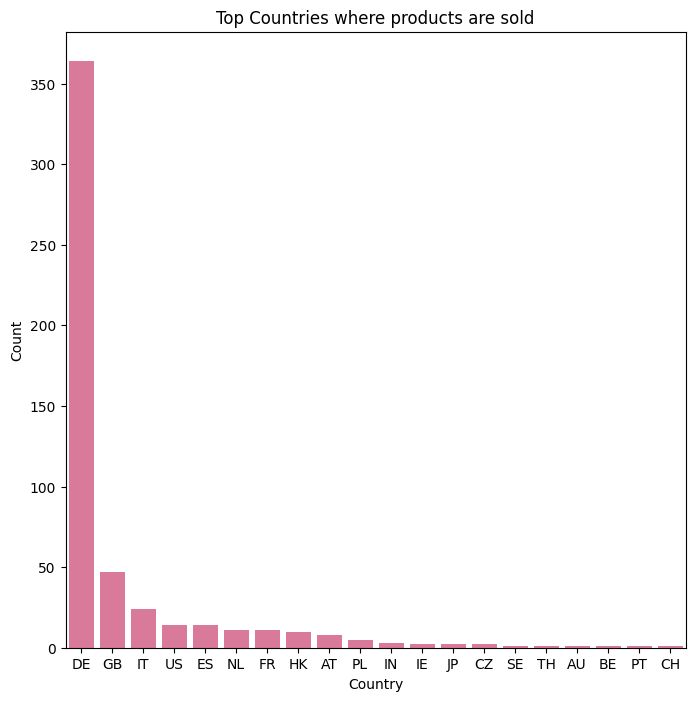

In [26]:
#Distribution of Countries where product are sold by sellers

plt.figure(figsize = (8,8))

sns.barplot(x= seller_count.index, y = seller_count.values, color = '#ea6a96')

plt.xlabel('Country')

plt.ylabel('Count')

plt.title('Top Countries where products are sold')

plt.show()

<ipython-input-27-4ee8fc82cfd0>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sellerproductcount'], color = '#ea6a96')


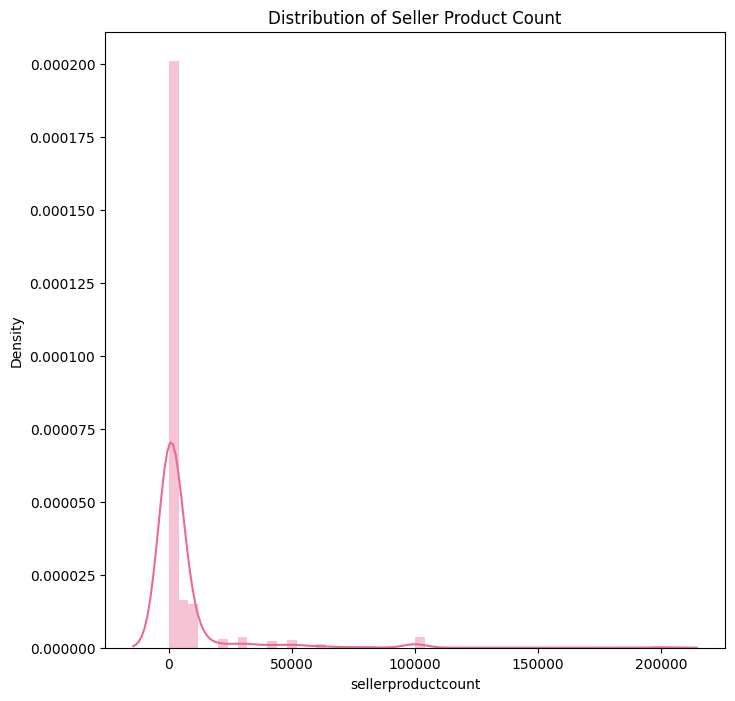

In [27]:
# Distribution of Product Count of Sellers

plt.figure(figsize=(8,8))

sns.distplot(df['sellerproductcount'], color = '#ea6a96')

plt.title("Distribution of Seller Product Count")

plt.show()

<ipython-input-28-92cfa4d33a09>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sellertotalratings'], color='#ea6a96')


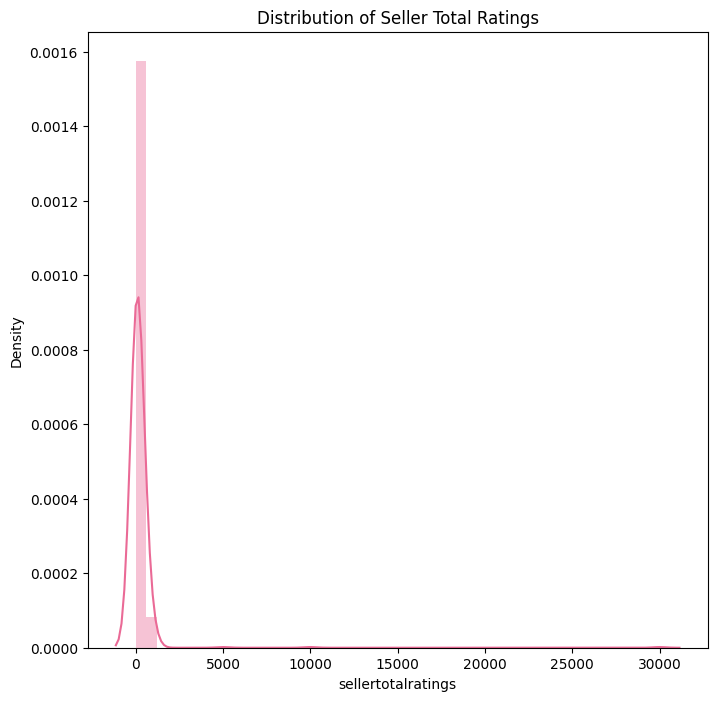

In [28]:
# Distribution of Product Count of Sellers

plt.figure(figsize=(8,8))

sns.distplot(df['sellertotalratings'], color='#ea6a96')

plt.title("Distribution of Seller Total Ratings")

plt.show()

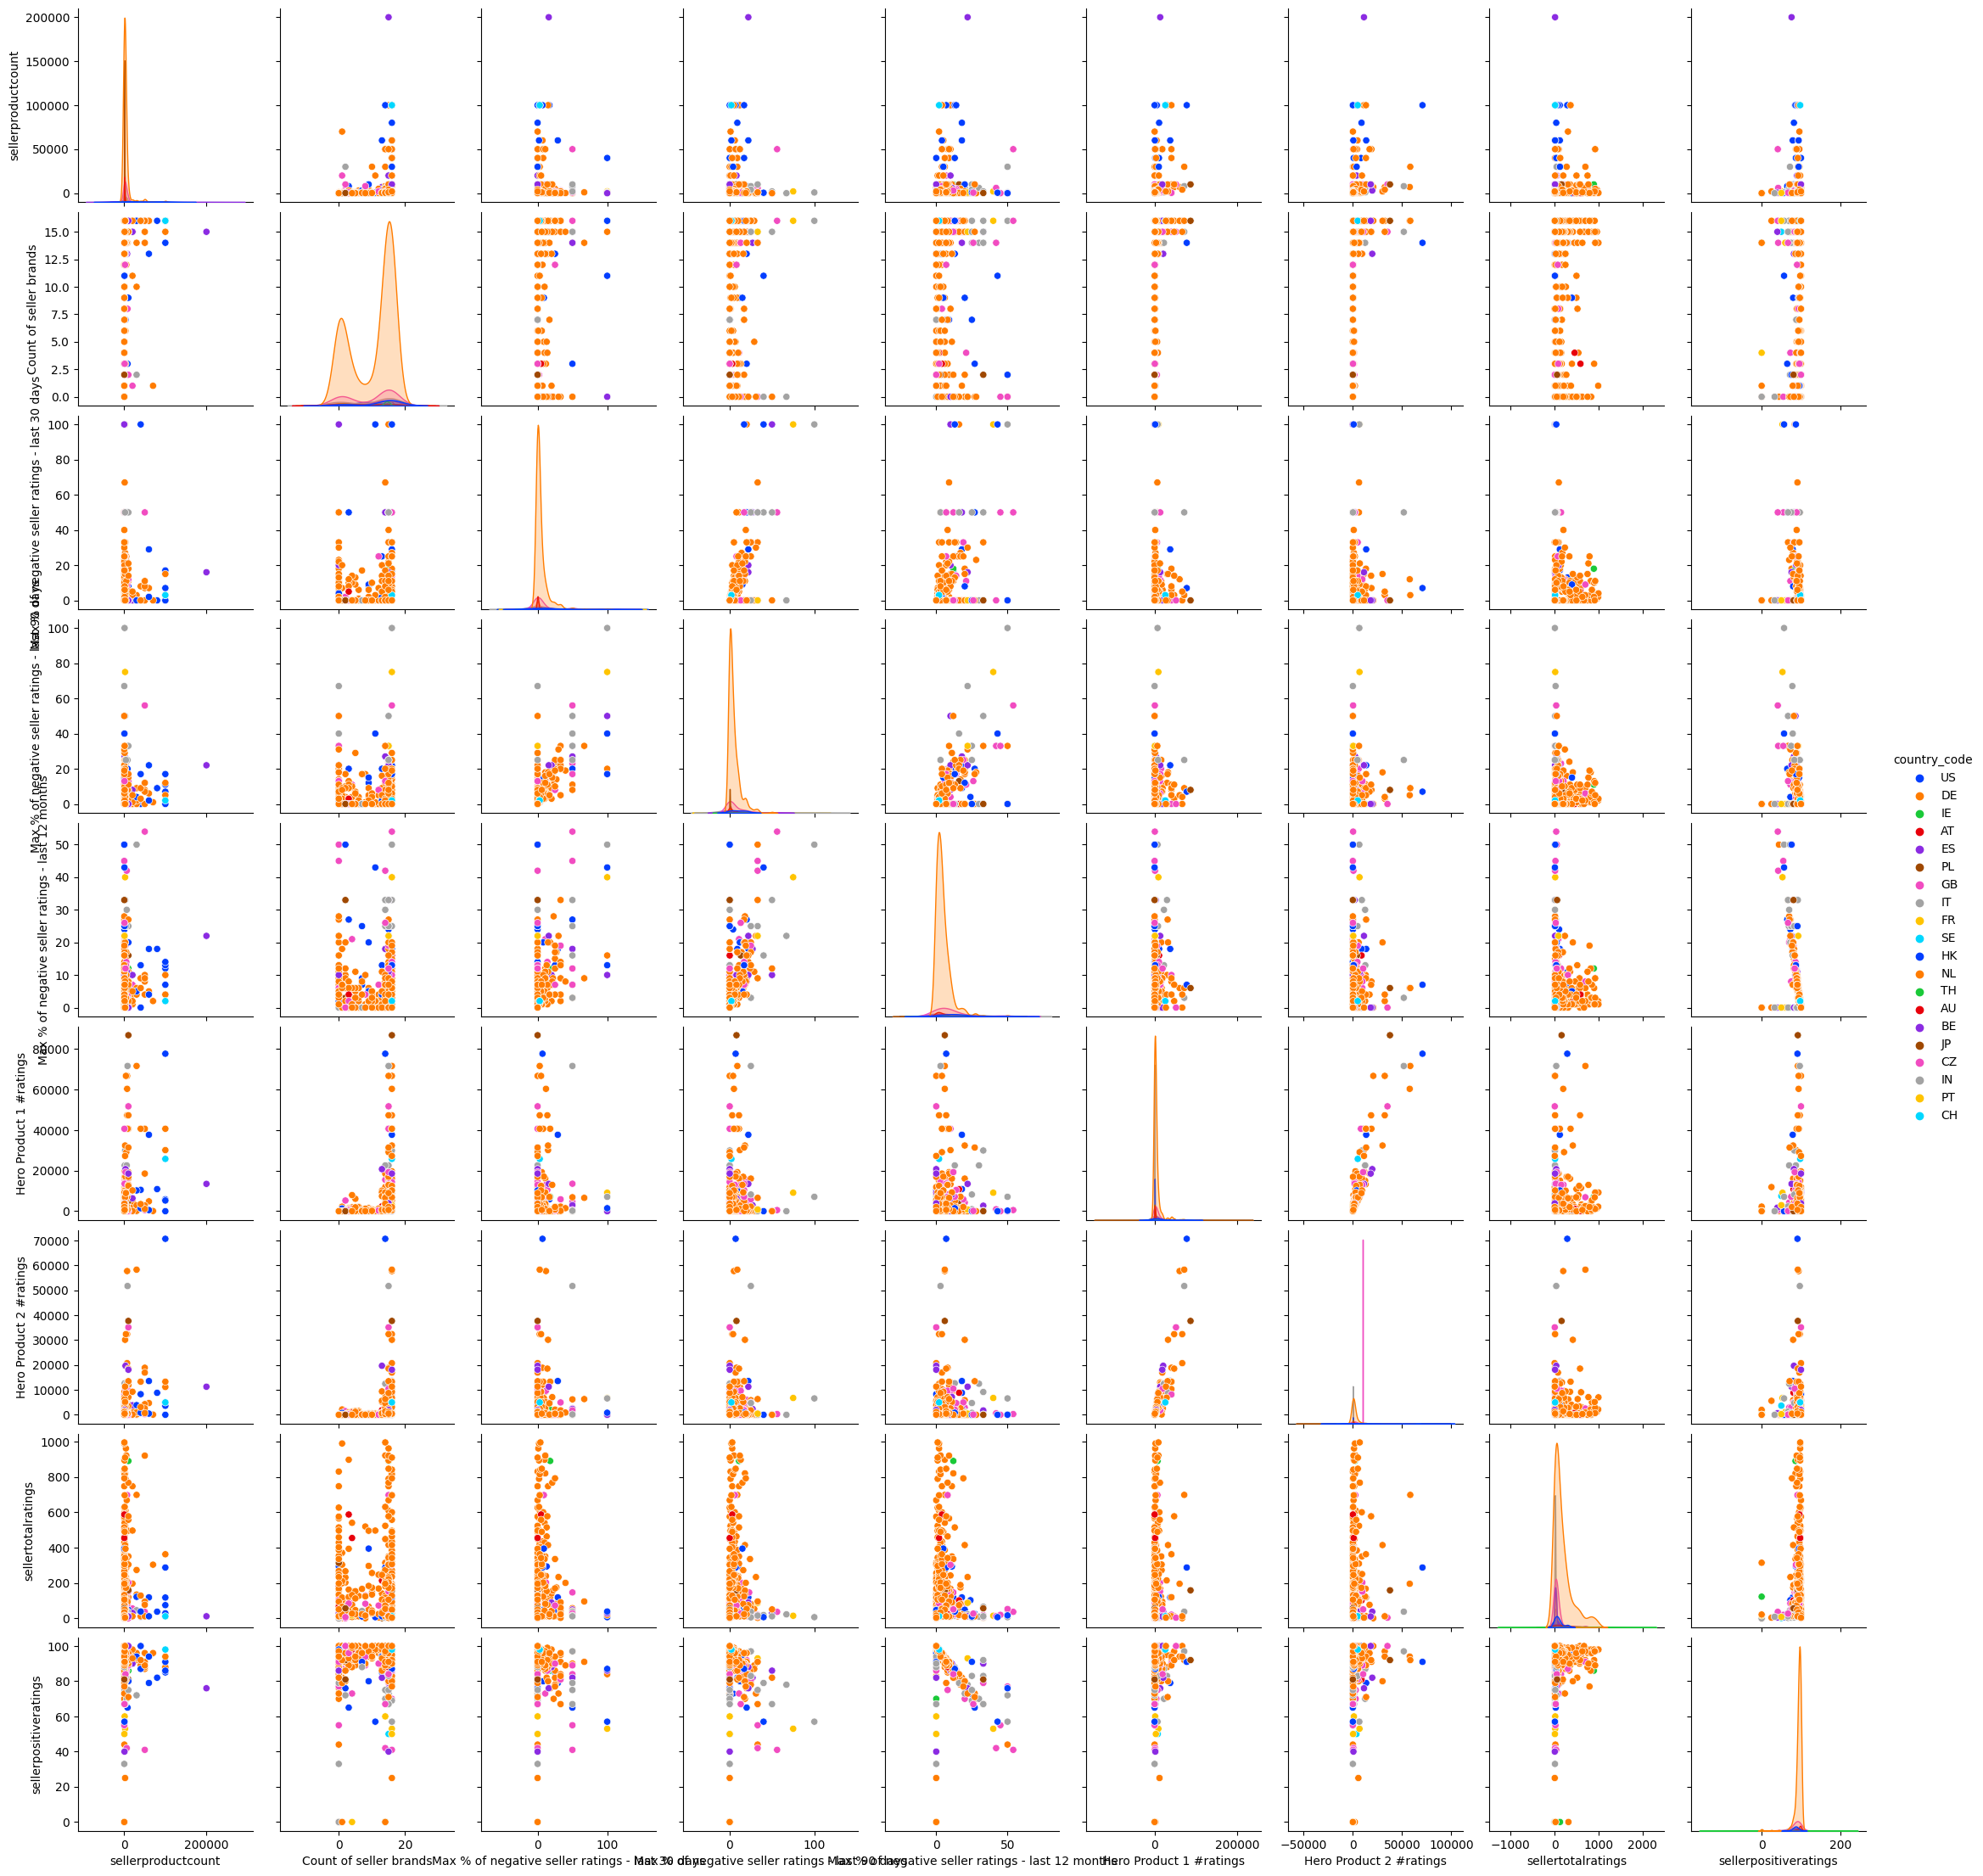

In [44]:
# Pairplot showing correlation between various features with respect to Country code

sns.pairplot(df, hue="country_code", palette='bright')

plt.show()

<ipython-input-30-ec5e50f61433>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


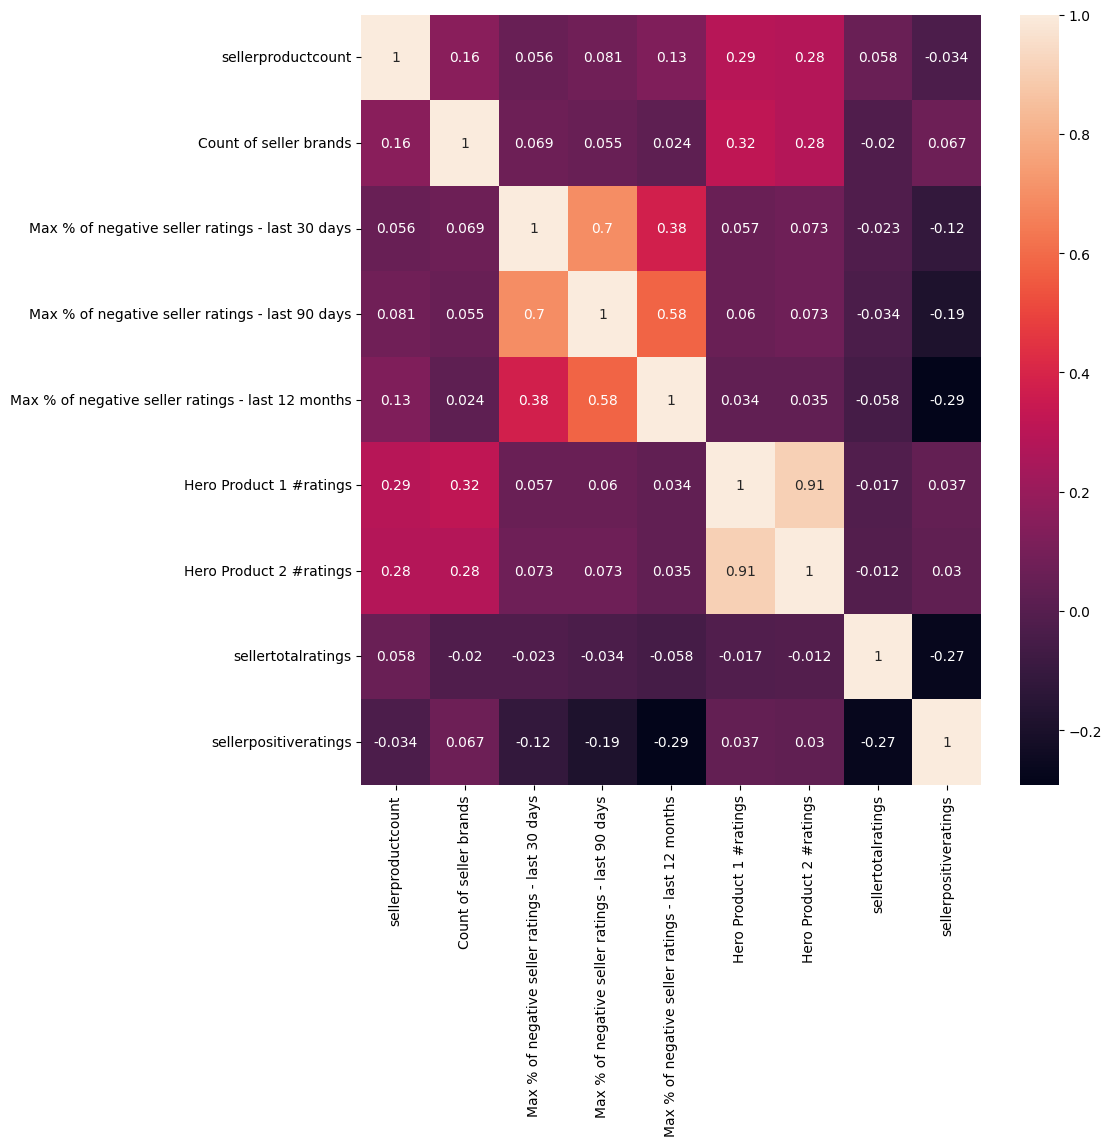

In [30]:
# Heatmap Correlation

plt.figure(figsize=(10,10))

sns.heatmap(df.corr(),annot=True)

plt.show()

### Observations

- The ratings of Hero Product 1 and Hero Product 2 exhibit a strong positive correlation. This suggests that these top-selling products tend to receive a similar number of ratings from customers.

- The percentage of negative reviews has a moderate correlation with the number of days and months.

- The top products of sellers,1 Hero 1 and Hero 2, show a slight correlation with both the seller product count and the count of seller brands

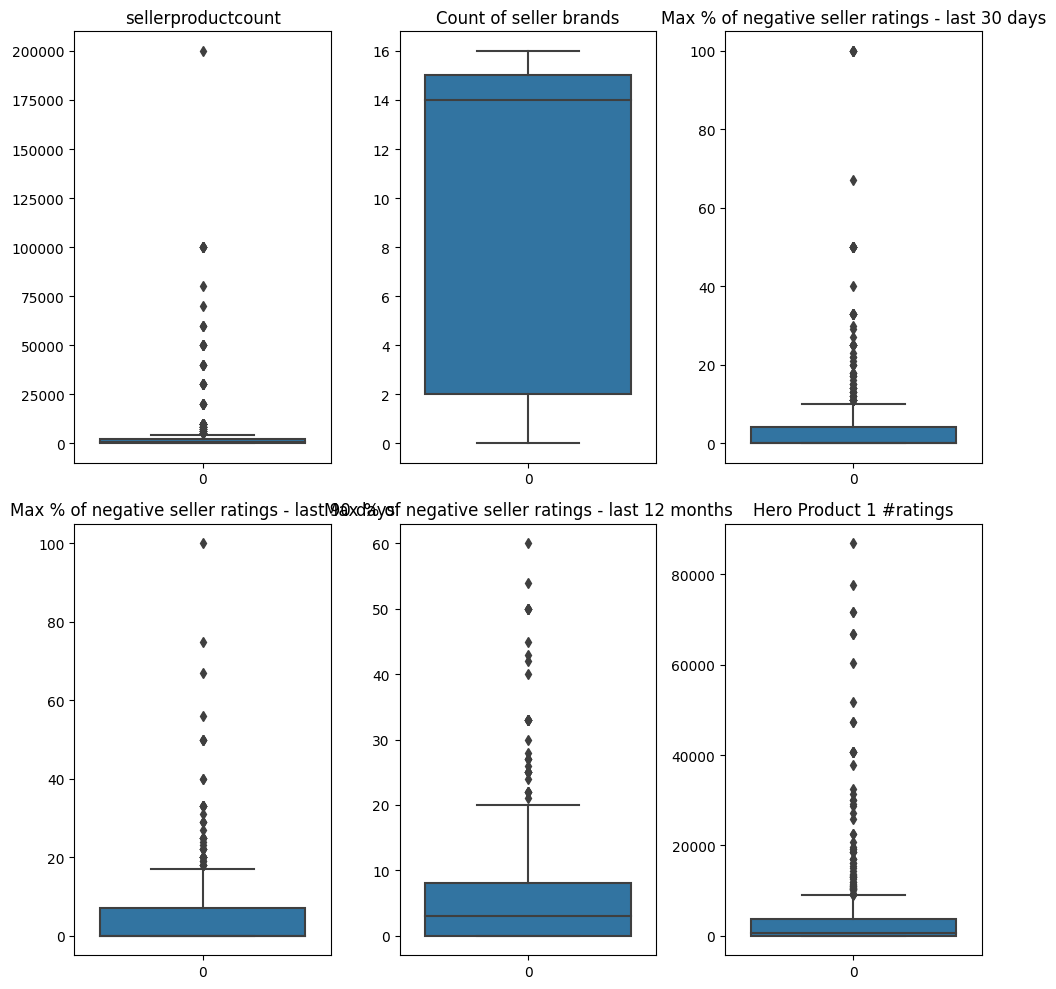

In [31]:
# BoxPlot showing Outliers in Numerical Columns

num_subplots = min(len(cols_with_num), 6)
plt.figure(figsize = (10,10))

plt.subplots_adjust(hspace = 0.5, wspace=0.5)

for i in range(num_subplots):
    plt.subplot(2, 3, i+1)  # Add 1 to i to start subplot numbering from 1

    sns.boxplot(df[cols_with_num[i]])
    plt.title(cols_with_num[i])

plt.tight_layout()
plt.show()

In [32]:
#Top countries in term of product count
df.groupby(by=['country_code'], as_index=False)['sellerproductcount'].sum().sort_values(by='sellerproductcount',
                                                                                          ascending=False)

,country_code,sellerproductcount
5,DE,1263668
19,US,663008
6,ES,249683
8,GB,174432
3,CH,100000
9,HK,75108
11,IN,41000
12,IT,36753
4,CZ,20000
13,JP,20000


In [33]:
#top seller in terms of product count
# Globally Top Sellers

df.groupby(by=['sellerlink'], as_index=False)['sellerproductcount'].sum().sort_values(by='sellerproductcount',
                                                                                          ascending=False).head(10)

,sellerlink,sellerproductcount
391,Seller 713,200000
0,Seller 1,100000
226,Seller 34,100000
130,Seller 1785,100000
177,Seller 24,100000
271,Seller 496,100000
253,Seller 445,100000
141,Seller 186,100000
560,Seller 986,100000
218,Seller 32,80000


In [34]:
# Country wise Top Sellers

data_1=df.groupby(by=['sellerlink','country_code'], as_index=False)['sellerproductcount'].sum().sort_values(by='sellerproductcount',
                                                                                          ascending=False)

In [35]:
#Identifying top 50 sellers per country with respect to total no of products
topsellers = {}

country_codes = df['country_code'].unique()

for col in country_codes:

    top = data_1[data_1['country_code'] == col]['sellerlink'][:50].values

    topsellers[col] = top
if 0 in topsellers:
    del topsellers[0]

print(topsellers)

{'US': array(['Seller 1', 'Seller 186', 'Seller 34', 'Seller 496', 'Seller 32',
       'Seller 27', 'Seller 23', 'Seller 969', 'Seller 1031',
       'Seller 438', 'Seller 218', 'Seller 1528', 'Seller 798',
       'Seller 33'], dtype=object), 'DE': array(['Seller 986', 'Seller 24', 'Seller 277', 'Seller 108',
       'Seller 1541', 'Seller 37', 'Seller 470', 'Seller 657',
       'Seller 916', 'Seller 1731', 'Seller 727', 'Seller 885',
       'Seller 323', 'Seller 679', 'Seller 938', 'Seller 1496',
       'Seller 102', 'Seller 196', 'Seller 387', 'Seller 967',
       'Seller 841', 'Seller 38', 'Seller 282', 'Seller 973',
       'Seller 832', 'Seller 112', 'Seller 1046', 'Seller 1059',
       'Seller 539', 'Seller 980', 'Seller 54', 'Seller 448',
       'Seller 322', 'Seller 101', 'Seller 135', 'Seller 805',
       'Seller 268', 'Seller 863', 'Seller 449', 'Seller 737',
       'Seller 1052', 'Seller 55', 'Seller 790', 'Seller 833',
       'Seller 486', 'Seller 883', 'Seller 1774', 'Seller 

In [36]:
# Top 10 Sellers with respect to total brands sold/available per seller, country wise
# Country wise Top Sellers

data_2 = df.groupby(by=['sellerlink','country_code'], as_index=False)['Count of seller brands'].sum().sort_values(by='Count of seller brands',
                                                                                          ascending=False)
topseller_2 = {}

country_codes = df['country_code'].unique()

for col in country_codes:

    top = data_2[data_2['country_code'] == col]['sellerlink'][:10].values

    topseller_2[col] = top
if 0 in topseller_2:
  del topseller_2[0]

print(topseller_2)

{'US': array(['Seller 1', 'Seller 27', 'Seller 32', 'Seller 34', 'Seller 23',
       'Seller 186', 'Seller 969', 'Seller 1528', 'Seller 1031',
       'Seller 496'], dtype=object), 'DE': array(['Seller 232', 'Seller 245', 'Seller 248', 'Seller 256',
       'Seller 258', 'Seller 273', 'Seller 276', 'Seller 281',
       'Seller 283', 'Seller 322'], dtype=object), nan: array([], dtype=object), 'IE': array(['Seller 36', 'Seller 21'], dtype=object), 'AT': array(['Seller 150', 'Seller 955', 'Seller 142', 'Seller 231',
       'Seller 884', 'Seller 941', 'Seller 22', 'Seller 743'],
      dtype=object), 'ES': array(['Seller 1513', 'Seller 665', 'Seller 602', 'Seller 713',
       'Seller 756', 'Seller 781', 'Seller 242', 'Seller 1768',
       'Seller 173', 'Seller 133'], dtype=object), 'PL': array(['Seller 214', 'Seller 1766', 'Seller 827', 'Seller 56',
       'Seller 513'], dtype=object), 'GB': array(['Seller 259', 'Seller 896', 'Seller 707', 'Seller 733',
       'Seller 777', 'Seller 606', 'Sel

In [37]:
# Top 20 Sellers with respect to total ratings given to their highest selling product, country wise

# Country wise Top Sellers

data_3 = df.groupby(by=['sellerlink','country_code'], as_index=False)['Hero Product 1 #ratings'].sum().sort_values(by='Hero Product 1 #ratings',
                                                                                          ascending=False)
topseller_3 = {}

country_codes = df['country_code'].unique()

for col in country_codes:

    top = data_3[data_3['country_code'] == col]['sellerlink'][:20].values

    topseller_3[col] = top
if 0 in topseller_3:
  del topseller_3[0]

print(topseller_3)

{'US': array(['Seller 496', 'Seller 27', 'Seller 32', 'Seller 23', 'Seller 1031',
       'Seller 1', 'Seller 34', 'Seller 969', 'Seller 218', 'Seller 798',
       'Seller 1528', 'Seller 438', 'Seller 33', 'Seller 186'],
      dtype=object), 'DE': array(['Seller 323', 'Seller 883', 'Seller 322', 'Seller 1059',
       'Seller 101', 'Seller 986', 'Seller 54', 'Seller 38', 'Seller 37',
       'Seller 727', 'Seller 838', 'Seller 1046', 'Seller 24',
       'Seller 833', 'Seller 111', 'Seller 387', 'Seller 470',
       'Seller 657', 'Seller 830', 'Seller 841'], dtype=object), nan: array([], dtype=object), 'IE': array(['Seller 36', 'Seller 21'], dtype=object), 'AT': array(['Seller 231', 'Seller 142', 'Seller 955', 'Seller 884',
       'Seller 150', 'Seller 941', 'Seller 22', 'Seller 743'],
      dtype=object), 'ES': array(['Seller 887', 'Seller 1513', 'Seller 713', 'Seller 173',
       'Seller 781', 'Seller 756', 'Seller 1768', 'Seller 602',
       'Seller 242', 'Seller 665', 'Seller 133', 'Se

In [38]:
# Most promising sellers per country that Razor Group team should reach out to and acquire with respect all of the above analysed aspects

In [39]:
# Merging Dictionaries

d_final = dict(topsellers)

d_final.update(topseller_2)

for i, j in topsellers.items():

    for x, y in topseller_2.items():

        if i == x:

            val = list(j) + list(y)

            d_final[i] = np.array(val)

In [40]:

# Futher merging with another dictionary

final_result = dict(d_final)

final_result.update(topseller_3)

for i, j in d_final.items():

    for x, y in topseller_3.items():

        if i == x:

            val = list(j) + list(y)

            final_result[i] = set(val)

In [41]:
#Final result to be considered for acquiring the sellers per country
# Top Sellers per country

print(final_result)

{'US': {'Seller 496', 'Seller 32', 'Seller 186', 'Seller 969', 'Seller 1', 'Seller 1031', 'Seller 34', 'Seller 438', 'Seller 218', 'Seller 1528', 'Seller 27', 'Seller 23', 'Seller 798', 'Seller 33'}, 'DE': {'Seller 938', 'Seller 790', 'Seller 1774', 'Seller 448', 'Seller 657', 'Seller 102', 'Seller 24', 'Seller 1541', 'Seller 679', 'Seller 322', 'Seller 37', 'Seller 1731', 'Seller 539', 'Seller 232', 'Seller 245', 'Seller 323', 'Seller 737', 'Seller 54', 'Seller 281', 'Seller 273', 'Seller 277', 'Seller 248', 'Seller 135', 'Seller 805', 'Seller 885', 'Seller 986', 'Seller 196', 'Seller 108', 'Seller 1046', 'Seller 1059', 'Seller 268', 'Seller 1496', 'Seller 55', 'Seller 841', 'Seller 387', 'Seller 449', 'Seller 282', 'Seller 1052', 'Seller 486', 'Seller 883', 'Seller 38', 'Seller 838', 'Seller 112', 'Seller 832', 'Seller 863', 'Seller 220', 'Seller 916', 'Seller 973', 'Seller 70', 'Seller 256', 'Seller 830', 'Seller 283', 'Seller 111', 'Seller 258', 'Seller 101', 'Seller 727', 'Seller 